In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes import *
from funcoes import read_QE_band as readband
from wulffpack import SingleCrystal

# BULK

In [2]:
DOS_colors = [
    '#BFEFFF',  # Bright Light Blue
    '#87CEFA',  # Bright Medium Blue
    'blue',  # Bright Dark Blue
    '0.7',  # Bright Light Grey
    '0.5',  # Same Medium Grey
    '0.2',  # Bright Dark Grey
    'deeppink',  # Bright Light Red
    '#FF4500',  # Bright Medium Red
    '#CD5C5C'   # Bright Dark Red
] #chatGPT

In [3]:
bandas = readband(r'CsPbBr3/band-cspbbr3.gnu')

In [4]:
dos = pd.read_csv(r'CsPbBr3/dos_CsPbBr3.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [5]:
DOS = dos['dos(E)']
E = dos['E(eV)']

In [6]:
indices = list(bandas['k'])
len(indices)

101

indice: 80
Band Gap = 1.6869 eV


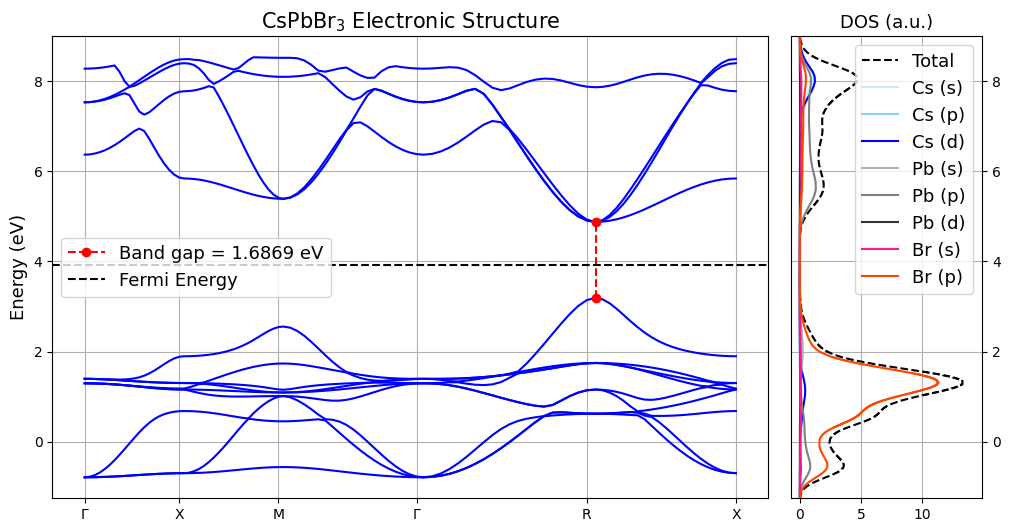

In [7]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[39], indices[59], indices[79], indices[-1]]

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(13,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e21'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e22'], c = 'red', linewidth = 1.5) # conduction band

# Band Gap:
bg = min(np.array(bandas['e22'])- np.array(bandas['e21']))
print('indice:', list(np.array(bandas['e22'])- np.array(bandas['e21'])).index(bg))
print('Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][80], bandas['e21'][80]
x2, y2 = bandas['k'][80], bandas['e22'][80]
ax.plot([x1, x2], [y1, y2], color='red', linestyle='--', marker='o', label='Band gap = 1.6869 eV')
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M", "$\Gamma$", 'R', 'X'])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ Electronic Structure', fontsize = 15)
ax.axhline(3.9128, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)'])*0.9,np.array(dos_objects[i]['E(eV)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig('CsPbBr3/banda_CsPbBr3.png', dpi = 200)

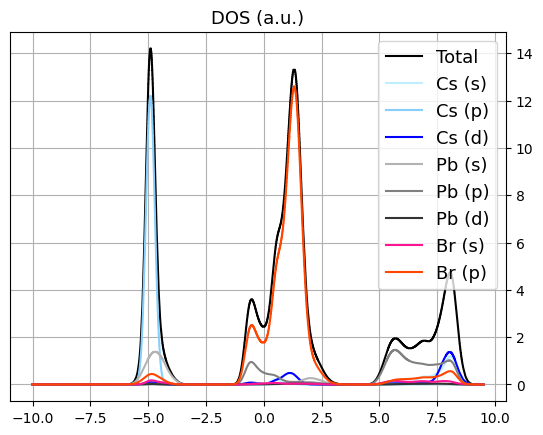

In [8]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5, label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)

# Surface Bands

## 001-1-8

In [9]:
bandas = readband(r'CsPbBr3/001/1-8/band-CsPbBr3-001-1-8.gnu')

In [10]:
dos = pd.read_csv(r'CsPbBr3/001/1-8/dos_CsPbBr3-001-1-8.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/001/1-8/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [11]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 50
Band Gap = 1.762 eV


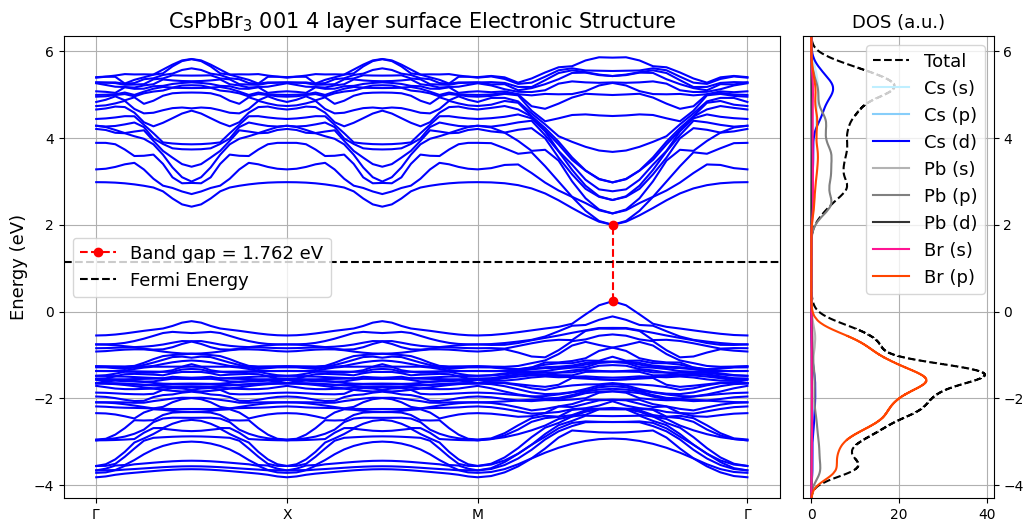

In [12]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 
#print(k_nodes)

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(53,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e59'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = 'red', linewidth = 1.5) # conduction band
# Band Gap:
bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
x1, y1 = bandas['k'][50], bandas['e87'][50]
x2, y2 = bandas['k'][50], bandas['e88'][50]
ax.plot([x1, x2], [y1, y2], color='red', linestyle='--', marker='o', label='Band gap = 1.762 eV')

print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 001 4 layer surface Electronic Structure', fontsize = 15)
ax.axhline(1.1380, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'center left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)

#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)'])*0.8,np.array(dos_objects[i]['E(eV)'])+0.6, label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/001/1-8/banda_CsPbBr3-001-1-8.png', dpi = 200)

## shift de - 0.6 eV

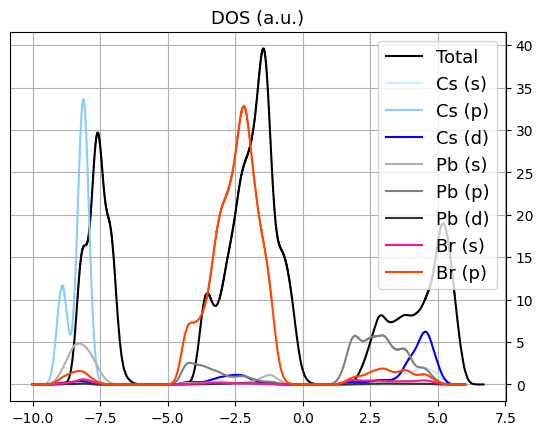

In [13]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5, label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)

## 110-1-8

In [14]:
bandas = readband(r'CsPbBr3/110/1-8/band-CsPbBr3-110-1-8.gnu')
dos = pd.read_csv(r'CsPbBr3/110/1-8/dos_CsPbBr3-110-1-8.txt', sep = ' ')

In [15]:
dos = pd.read_csv(r'CsPbBr3/110/1-8/dos_CsPbBr3-110-1-8.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/110/1-8/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [16]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

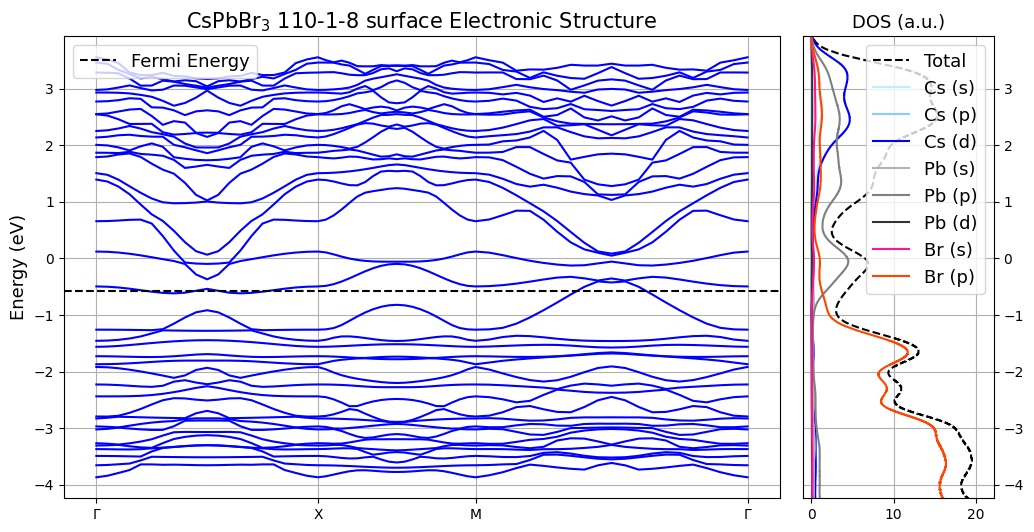

In [17]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[20], indices[40], indices[60]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(70,nbnd):
#for i in range(0,nbnd):
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e59'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e60'], c = 'red', linewidth = 1.5) # conduction band
# Band Gap:
fermi =-0.5706

#print('Band Gap =', bg, 'eV')

ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","X","M","$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 110-1-8 surface Electronic Structure', fontsize = 15)
ax.axhline(fermi, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)'])*0.95,np.array(dos_objects[i]['E(eV)']-0.45), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/110/1-8/banda_CsPbBr3-110-1-8.png', dpi = 200)

## shift de 0.45 eV

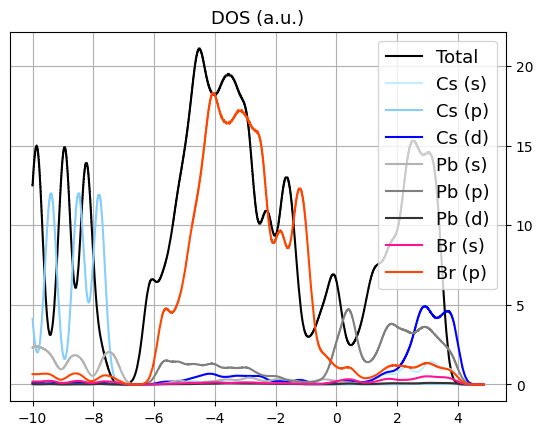

In [18]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5, label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)']), np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)

## 111-1-8

In [19]:
bandas = readband(r'CsPbBr3/111/1-8/band-CsPbBr3-111-1-8.gnu')

In [20]:
dos = pd.read_csv(r'CsPbBr3/111/1-8/dos_CsPbBr3-111-1-8.txt', sep = ' ')
dos_cs_s = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Cs-s.txt', sep = ' ')
dos_cs_p = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Cs-p.txt', sep = ' ')
dos_cs_d = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Cs-d.txt', sep = ' ')
dos_pb_s = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Pb-s.txt', sep = ' ')
dos_pb_p = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Pb-p.txt', sep = ' ')
dos_pb_d = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Pb-d.txt', sep = ' ')
dos_br_s = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Br-s.txt', sep = ' ')
dos_br_p = pd.read_csv(r'CsPbBr3/111/1-8/DOS-Br-p.txt', sep = ' ')
dos_objects = [dos_cs_s, dos_cs_p, dos_cs_d, dos_pb_s, dos_pb_p, dos_pb_d, dos_br_s, dos_br_p]
dos_legends = ['Cs (s)', 'Cs (p)', 'Cs (d)', 'Pb (s)', 'Pb (p)', 'Pb (d)', 'Br (s)', 'Br (p)']

In [21]:
DOS = dos['dos(E)']
E = dos['E(eV)']
indices = list(bandas['k'])
len(indices)

61

indice: 47
Direct Band Gap = 0.675 eV


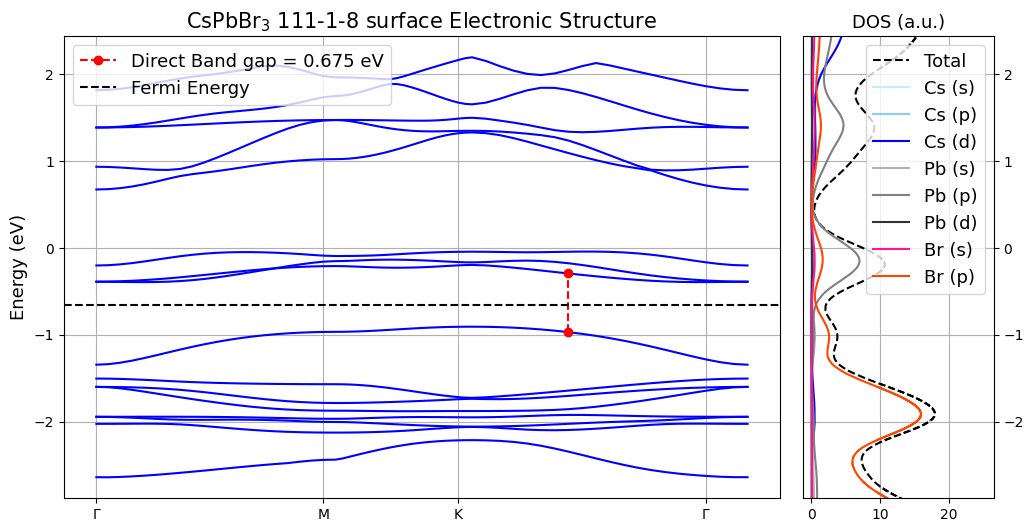

In [22]:
nbnd = len(bandas.keys())-1
k_nodes = [indices[0], indices[19], indices[38], indices[57]] 

fig, (ax, ax_dos) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 0.8]})

for i in range(80,nbnd-10):
#for i in range(0,nbnd):    
    ax.plot(bandas['k'], bandas['e'+str(i)], c = 'blue', linewidth = 1.5)
    
#ax.plot(bandas['k'], bandas['e87'], c = 'red', linewidth = 1.5) #Valence band
#ax.plot(bandas['k'], bandas['e88'], c = 'red', linewidth = 1.5) # conduction band

# Band Gap:

bg = min(np.array(bandas['e88'])- np.array(bandas['e87']))
print('indice:', list(np.array(bandas['e88'])- np.array(bandas['e87'])).index(bg))
print('Direct Band Gap =', bg, 'eV')
x1, y1 = bandas['k'][47], bandas['e87'][47]
x2, y2 = bandas['k'][47], bandas['e88'][47]
ax.plot([x1, x2], [y1, y2], color='red', linestyle='--', marker='o', label='Direct Band gap = 0.675 eV')

#plot:
ax.set_xticks(k_nodes)
ax.set_xticklabels(["$\Gamma$","M", "K", "$\Gamma$"])
ax.grid('--')
ax.set_title(r'CsPbBr$_3$ 111-1-8 surface Electronic Structure', fontsize = 15)
ax.axhline(-0.6517, linestyle = '--', color = '0', label = 'Fermi Energy')
ax.legend(loc = 'upper left', fontsize = 13)
ax.set_ylabel('Energy (eV)', fontsize = 13)


#DOS
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(DOS, E, color='0', label='Total', linestyle = '--')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['pdos(E)'])*0.95,np.array(dos_objects[i]['E(eV)']-0.35), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05) 
ax_dos.set_ylim(ax.get_ylim())  

plt.savefig(r'CsPbBr3/111/1-8/banda_CsPbBr3-111-1-8.png', dpi = 200)

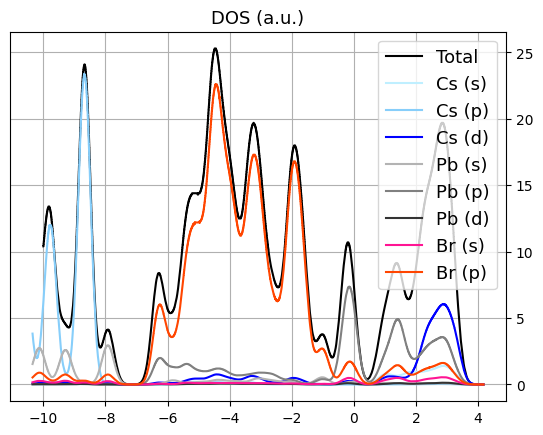

In [23]:
fig, ax_dos = plt.subplots(1,1)
ax_dos.set_title('DOS (a.u.)', fontsize = 13)
#ax_dos.set_xlim(0,3)
ax_dos.plot(E,DOS, color='0', linewidth=1.5, label='Total')
for i in range(8):
    ax_dos.plot(np.array(dos_objects[i]['E(eV)'])-0.35, np.array(dos_objects[i]['pdos(E)']), label = dos_legends[i], c= DOS_colors[i])
    ax_dos.yaxis.set_label_position("right")
    ax_dos.legend(loc='upper right', fontsize = 13)
    ax_dos.grid('--')
    ax_dos.yaxis.tick_right()
fig.subplots_adjust(wspace=0.05)